# Dataset: Stanford Open Policing Project

## Get dataset from here: https://openpolicing.stanford.edu/data/

In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0         NaN       Citation       False      0-15 

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 14)


In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isna().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64
(86406, 14)


### We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

In [4]:
print(ri.dtypes)

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object


In [5]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

object
bool


In [6]:
# Creating timestamp column from 2 existing columns and casting it to timestamp so we can utilize the datatime methods efficiently

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object


In [7]:
# Set 'stop_datetime' as the index
ri.set_index(keys='stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')


## Question: Do the genders commit different violations?

In [8]:
# Count the unique values in 'violation'
# print(ri['violation'].value_counts())

# Express the violations counts as proportions
print(ri['violation'].value_counts(normalize=True))

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64


### More than half of all violations are for speeding, followed by other moving violations and equipment violations.

In [9]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender']=='F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print("Violations By Female drivers: ")
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print("\n\nViolations By Male drivers: ")
print(male.violation.value_counts(normalize=True))

Violations By Female drivers: 
Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64


Violations By Male drivers: 
Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

### Question: Does gender affect who gets a ticket for speeding?

In [10]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Female Speeding violations(in %):")
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print("\n\nMale Speeding violations(in %):")
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Female Speeding violations(in %):
Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
Arrest Passenger    0.000840
N/D                 0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64


Male Speeding violations(in %):
Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
N/D                 0.001061
No Action           0.001061
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

### Question: Does gender affect whose vehicle is searched?

In [11]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963012
True     0.036988
Name: search_conducted, dtype: float64
0.036988172117677014


In [12]:
# Calculate the search rate for both groups
print(ri.groupby(ri.driver_gender).search_conducted.mean())

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64


Male drivers are searched more than twice as often as female drivers. Why might this be?

In [13]:
# Odering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

### Question: Does gender affect who is frisked during a search?

In [14]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [15]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.08573216520650813
driver_gender
F    0.061571
M    0.089908
Name: frisk, dtype: float64


The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

### Question: Does time of day affect arrest rate?

In [16]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03389810892762077
stop_datetime
0     0.047393
1     0.061428
2     0.062914
3     0.053221
4     0.074074
5     0.031915
6     0.014045
7     0.013498
8     0.020449
9     0.024703
10    0.025278
11    0.027037
12    0.032999
13    0.030100
14    0.032716
15    0.032307
16    0.030765
17    0.032757
18    0.043988
19    0.031506
20    0.041048
21    0.053795
22    0.043397
23    0.042825
Name: is_arrested, dtype: float64


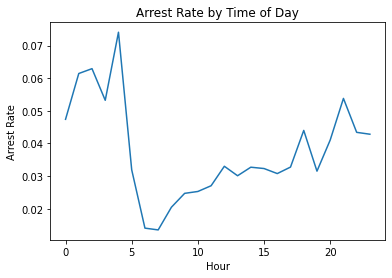

In [17]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Question: Are drug-related stops on the rise?

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


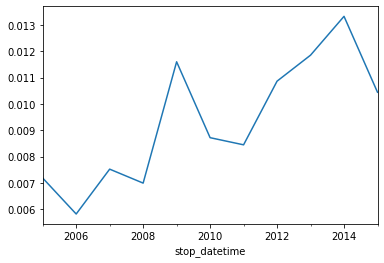

In [18]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('Y').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('Y').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years.
Why? Are we not conducting enough searches.

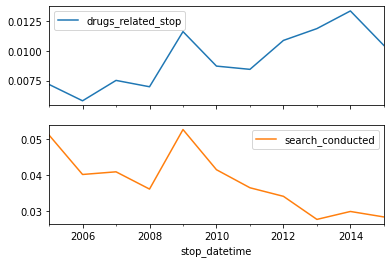

In [19]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample("A").mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)
# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

### Question: How long might you be stopped for a violation?

In [20]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {"1": 8 , "2": 8, "0-15 Min":8 , '16-30 Min' : 23,'30+ Min' : 45 }

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8 23 45]


violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.899901
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577743
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64


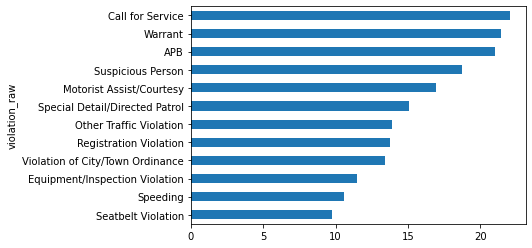

In [21]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby(ri.violation_raw).stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby(ri.violation_raw).stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values(ascending=True).plot(kind='barh')

# Display the plot
plt.show()

### Question: What are the average Stop minutes for each violations?

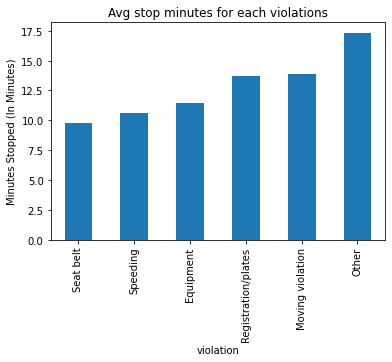

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
ri.groupby('violation').stop_minutes.mean().sort_values().plot(kind='bar')
plt.ylabel("Minutes Stopped (In Minutes)")
plt.title("Avg stop minutes for each violations")
plt.show()

### Question: Is there any relationship between age and violations?

In [23]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'frisk', 'stop_minutes'],
      dtype='object')

In [24]:
# Verifying/Authenticating Age provided:
ri.driver_age.describe()
# ri[calculated_age]=ri.stop_datetime.dt.year - ri.driver_age

count    86113.000000
mean        34.011868
std         12.738786
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         99.000000
Name: driver_age, dtype: float64

It seems the data is authentic as max and min are acceptable ages

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

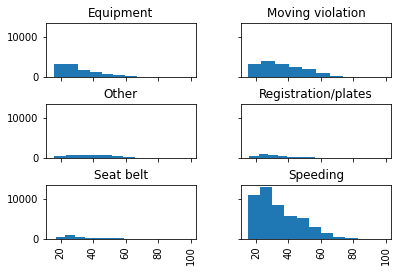

In [25]:
# We have to use shareX and shareY so we get same scal for all graph so it is more visually comparible/comprehensible.
ri.hist('driver_age', by='violation', sharex=True, sharey=True)
# plt.yscale('log')

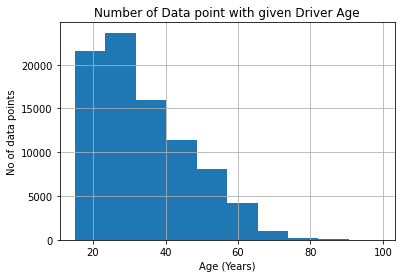

In [26]:
ri.driver_age.hist()
plt.title("Number of Data point with given Driver Age")
plt.xlabel("Age (Years)")
plt.ylabel("No of data points")
plt.show()

As you can see from previous graph that thare for age 25-30 years have been having these violations in the most cases. However, we can't conclude that age is causing the violation as the collected data is having inclination toward that age range as per graph shown above.

## Now we are checking if the weather affects the behaviour in police activity

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


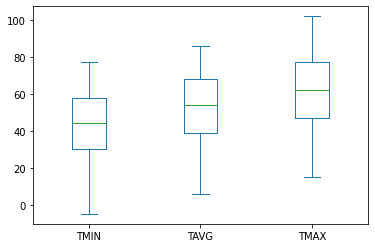

In [27]:
# Read 'weather.csv' into a DataFrame named 'weather'
import pandas as pd
weather=pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

First we are identifying that the data is trustworthy by checking:

    1: If the max is greater than mean and min is less than mean
    
    2: Columns have Appropriate values like non-negative or unexpected values
    
    3: Distribution of general parameter ( where we have assumption on valriable's population distribution )

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


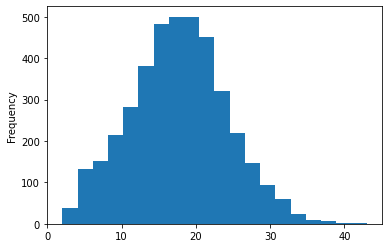

In [28]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']=weather['TMAX']-weather['TMIN']

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

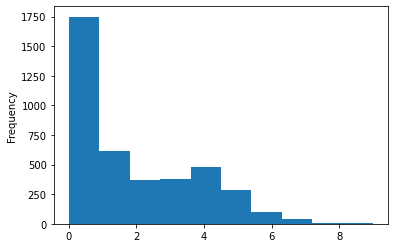

In [29]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01' : 'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

In [30]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse' , 8:'worse' ,9:'worse' }

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


This rating system should make the weather condition data easier to understand.

In [31]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [32]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender  driver_age_raw  \
0 2005-01-02 01:55:00  2005-01-02     01:55             M          1985.0   
1 2005-01-18 08:15:00  2005-01-18     08:15             M          1965.0   
2 2005-01-23 23:15:00  2005-01-23     23:15             M          1972.0   
3 2005-02-20 17:15:00  2005-02-20     17:15             M          1986.0   
4 2005-03-14 10:00:00  2005-03-14     10:00             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome  is_arrested stop_duration  drugs_related_stop  \
0      

In [33]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86406, 17)
(86406, 19)


In [34]:
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.051874
                     bad       0.058137
                     worse     0.098385
Moving violation     good      0.056034
                     bad       0.054080
                     worse     0.066807
Other                good      0.080735
                     bad       0.085547
                     worse     0.051643
Registration/plates  good      0.085227
                     bad       0.110013
                     worse     0.096970
Seat belt            good      0.028602
                     bad       0.019196
                     worse     0.000000
Speeding             good      0.012606
                     bad       0.013237
                     worse     0.015361
Name: is_arrested, dtype: float64


The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

In [35]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc[ 'Moving violation' , 'bad' ])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.051874
                     bad       0.058137
                     worse     0.098385
Moving violation     good      0.056034
                     bad       0.054080
                     worse     0.066807
Other                good      0.080735
                     bad       0.085547
                     worse     0.051643
Registration/plates  good      0.085227
                     bad       0.110013
                     worse     0.096970
Seat belt            good      0.028602
                     bad       0.019196
                     worse     0.000000
Speeding             good      0.012606
                     bad       0.013237
                     worse     0.015361
Name: is_arrested, dtype: float64
0.054079696394686905
rating
good     0.012606
bad      0.013237
worse    0.015361
Name: is_arrested, dtype: float64


### Question: Search conducted have anything to do with driver Race?

In [36]:
ri.columns

Index(['stop_datetime', 'stop_date', 'stop_time', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'frisk',
       'stop_minutes'],
      dtype='object')

In [37]:
# Overall driver race searched count
ri.groupby(ri.driver_race).search_conducted.sum()

driver_race
Asian         51
Black        790
Hispanic     584
Other          3
White       1768
Name: search_conducted, dtype: int64

In [38]:
# Let's check arrest rate in comparison as well
ri.groupby(ri.driver_race).is_arrested.sum()

driver_race
Asian         41
Black        705
Hispanic     566
Other          2
White       1615
Name: is_arrested, dtype: int64

In [39]:
asian_searched = ri[ri.driver_race=='Asian'].groupby([ri.stop_datetime.dt.month]).search_conducted.sum()
black_searched = ri[ri.driver_race=='Black'].groupby([ri.stop_datetime.dt.month]).search_conducted.sum()
hispanic_searched = ri[ri.driver_race=='Hispanic'].groupby([ri.stop_datetime.dt.month]).search_conducted.sum()
white_searched = ri[ri.driver_race=='White'].groupby([ri.stop_datetime.dt.month]).search_conducted.sum()
other_searched = ri[ri.driver_race=='Other'].groupby([ri.stop_datetime.dt.month]).search_conducted.sum()


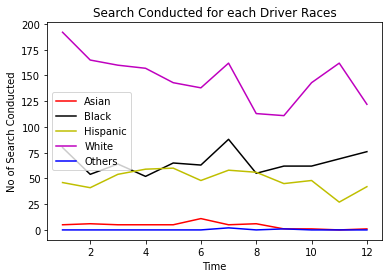

In [40]:
asian_searched.plot(color='r',label='Asian')
black_searched.plot(color='k',label='Black')
hispanic_searched.plot(color='y',label='Hispanic')
white_searched.plot(color='m',label='White')
other_searched.plot(color='b',label='Others')
plt.title("Search Conducted for each Driver Races")
plt.ylabel("No of Search Conducted")
plt.xlabel("Time")
plt.legend()
plt.show()

In [41]:
search_conducted_by_race=ri.groupby([ri.stop_datetime.dt.month,ri.driver_race]).search_conducted.sum()
print(search_conducted_by_race)

print(type(search_conducted_by_race))
print(search_conducted_by_race.unstack())
print(type(search_conducted_by_race.unstack()))
print(search_conducted_by_race.unstack().columns)


stop_datetime  driver_race
1              Asian            5
               Black           80
               Hispanic        46
               Other            0
               White          192
2              Asian            6
               Black           54
               Hispanic        41
               Other            0
               White          165
3              Asian            5
               Black           64
               Hispanic        54
               Other            0
               White          160
4              Asian            5
               Black           52
               Hispanic        59
               Other            0
               White          157
5              Asian            5
               Black           65
               Hispanic        60
               Other            0
               White          143
6              Asian           11
               Black           63
               Hispanic        48
               Other 